Shallow neural networks have one hidden layer, with multiple hidden units (neurons) in it. Deep neural networks extend this concept by adding multiple hidden layers.

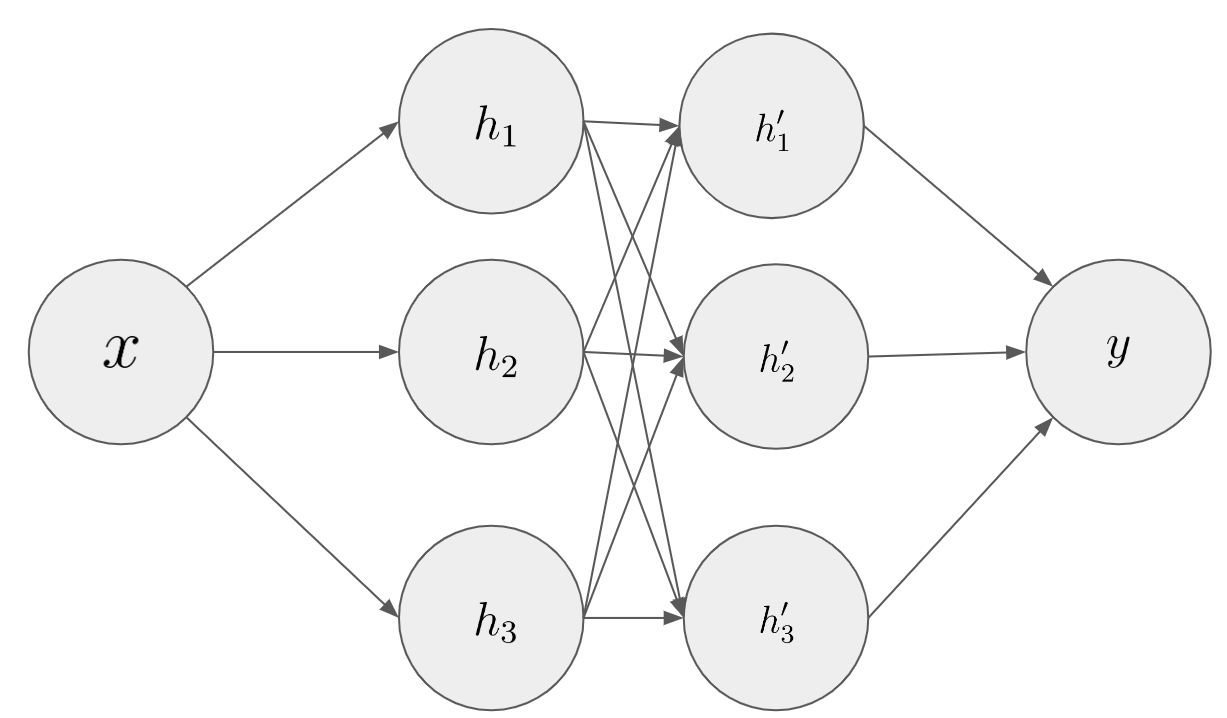

In [1]:
from IPython.display import Image

# Display image
Image(filename='images/010_deep_neural_network.png', width=500)

The first layer is defined by:
$$h_i = \text{ReLU}\left[\theta_{i0} + \theta_{i1} x\right]$$

The second layer is defined by:
$$ h'_{i} = \text{ReLU}\left[\psi_{i0} + \psi_{i1}h_{1} + \psi_{i2}h_{2} + \psi_{i3}h_{3}\right]$$

The output is formed by combining the hidden units of the last layer:
$$y' = \phi_0' + \phi_1' h_1' + \phi_2' h_2' + \phi_3' h_3'$$


We could equivalently describe equations in matrix notation.


The first layer of the deep neural network is defined by:
$$
\begin{bmatrix} h_1 \\ h_2 \\ h_3 \end{bmatrix} = \text{ReLU}\left[
\begin{bmatrix} \theta_{10} \\ \theta_{20} \\ \theta_{30} \end{bmatrix} +
\begin{bmatrix} \theta_{11} \\ \theta_{21} \\ \theta_{31} \end{bmatrix}
x\right]
$$

The second layer is defined by:
$$
\begin{bmatrix} h_1' \\ h_2' \\ h_3' \end{bmatrix} =
\text{ReLU}
\left[
\begin{bmatrix} \psi_{10} \\ \psi_{20} \\ \psi_{30} \end{bmatrix}
+
  \begin{bmatrix}
    \psi_{11}&\psi_{12}&\psi_{13}\\
    \psi_{21}&\psi_{22}&\psi_{23}\\
    \psi _{31}&\psi _{32}&\psi _{33}
  \end {bmatrix}
  \begin {bmatrix}
    h_1\\h_2\\h_3
  \end {bmatrix}
\right]
$$

The output is formed by combining the hidden units of the last layer:
$$
y' = \phi_0' +
\begin{bmatrix} \phi_1' & \phi_2' & \phi_3'
\end{bmatrix}
\begin{bmatrix} h_1' \\ h_2' \\ h_3' \end{bmatrix}
$$

A general form of deep neural networks with $K$ layers can now be written as:

\begin{align*}
h_1 & = \text{ReLU}(\beta_0 + \mathbf{\Omega}_0x) \\
h_2 & = \text{ReLU}(\beta_1 + \mathbf{\Omega}_1h1) \\
h_3 & = \text{ReLU}(\beta_2 + \mathbf{\Omega}_2h2) \\
& \vdots \\
h_K & = \text{ReLU}(\beta_{K-1} + \mathbf{\Omega}_{K-1}h_{K-1}) \\
y & = \beta_K + \mathbf{\Omega}_K h_K.
\end{align*}


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Set the seed for reproducibility
tf.random.set_seed(0)

# Generate 100 random numbers between 0 and 10
x = 10 * tf.random.uniform(shape=(100,))

# Calculate y based on the formula with some noise added
y = 0.5 * tf.math.sin(x) + 0.01 * tf.random.normal(shape=(100,))

plt.figure(figsize=(10, 7))

# Create a scatter plot of the generated points with red color
plt.scatter(x, y, color='red')

# Set the labels of the plot
plt.xlabel('Input, x')
plt.ylabel('Output, y')

# Show the plot
plt.show()

In [ ]:
import tensorflow as tf

# model
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(100, activation="relu", input_shape=(1,)),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)

# compile
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.mse)

# fit
model.fit(x, y, epochs=1000)

In [ ]:
def plot_predictions(model, x, y):
    # Predict y values
    y_pred = model.predict(x)

    # Sort x and y_pred for line plot
    sorted_zip = sorted(zip(x, y_pred), key=lambda x: x[0])
    x_sorted, y_pred_sorted = zip(*sorted_zip)

    plt.figure(figsize=(10, 7))

    # Create a scatter plot of the actual points with red color
    plt.scatter(x, y, color='red')

    # Plot the predicted values with blue color
    plt.plot(x_sorted, y_pred_sorted, color='blue', linewidth=3)

    # Set the labels of the plot
    plt.xlabel('Input, x')
    plt.ylabel('Output, y')

    # Show the plot
    plt.show()

plot_predictions(model, x, y)

In [ ]:
model.summary()